In [1]:
pip install tensorflow matplotlib numpy scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import pandas as pd

df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
df = df.drop('Cabin', axis=1)

KeyError: "['Cabin'] not found in axis"

In [20]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [23]:
import pandas as pd


df = pd.read_csv("train.csv")

# Pulizia
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.drop('Cabin', axis=1)


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')


df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6), object(2)
memory usage: 72.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


Matplotlib is building the font cache; this may take a moment.


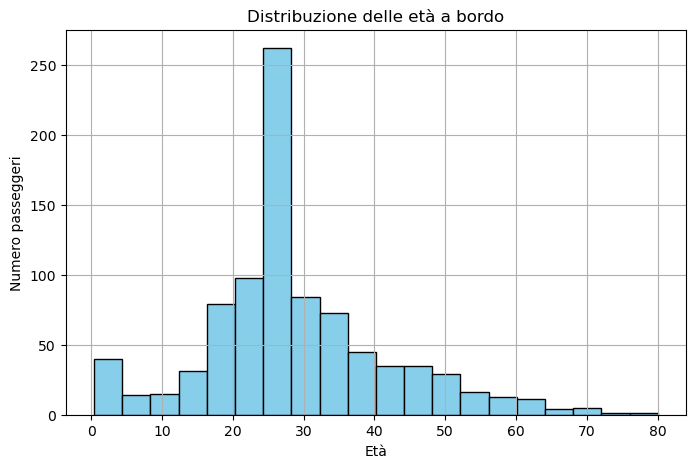

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
df["Age"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Età")
plt.ylabel("Numero passeggeri")
plt.title("Distribuzione delle età a bordo")
plt.show()

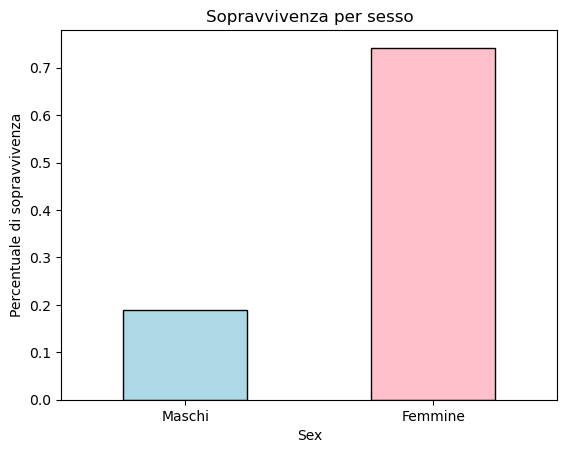

In [25]:
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=['lightblue', 'pink'], edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.xticks([0, 1], ['Maschi', 'Femmine'], rotation=0)
plt.show()

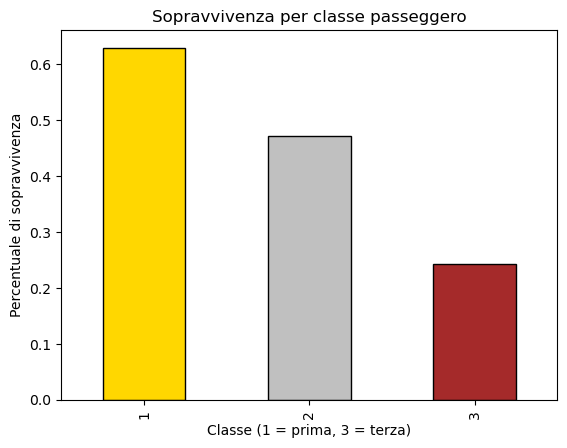

In [26]:
df.groupby("Pclass")["Survived"].mean().plot(kind="bar", color=['gold', 'silver', 'brown'], edgecolor='black')
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per classe passeggero")
plt.xlabel("Classe (1 = prima, 3 = terza)")
plt.show()

C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_8184\2331102287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="pastel")


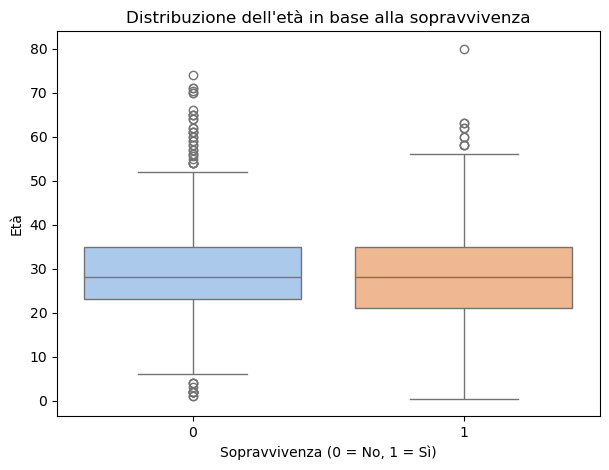

In [27]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Survived", y="Age", data=df, palette="pastel")
plt.title("Distribuzione dell'età in base alla sopravvivenza")
plt.xlabel("Sopravvivenza (0 = No, 1 = Sì)")
plt.ylabel("Età")
plt.show()

C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_8184\1739780856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=df, palette='viridis')


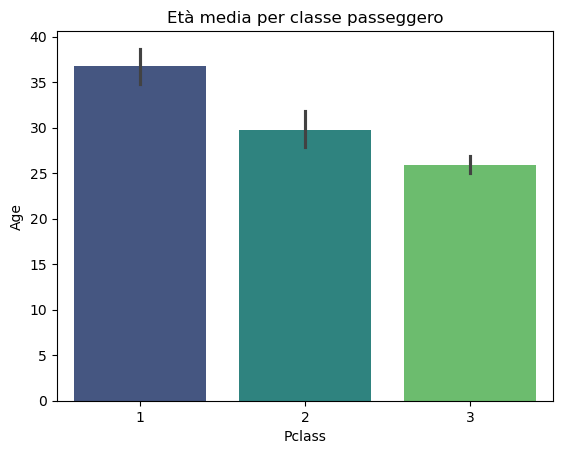

In [28]:
sns.barplot(x='Pclass', y='Age', data=df, palette='viridis')
plt.title("Età media per classe passeggero")
plt.show()

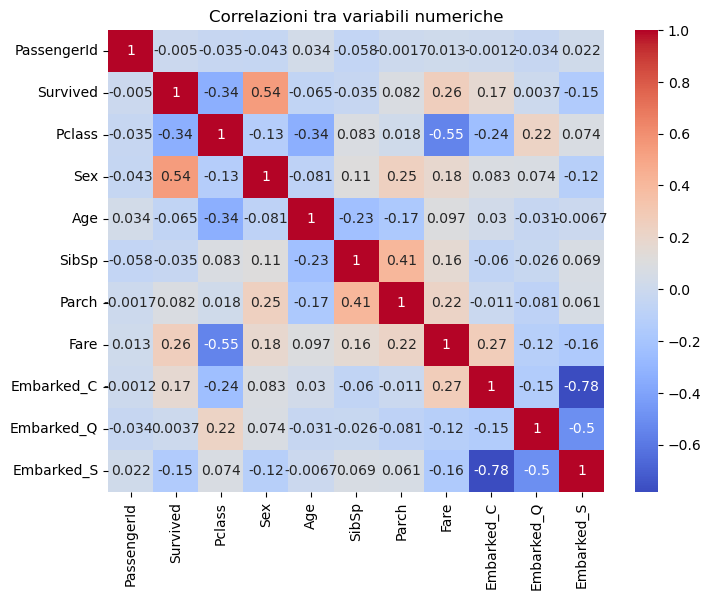

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlazioni tra variabili numeriche")
plt.show()